## HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the csv file and creating a dataframe
df = pd.read_csv("HR_analytics.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


By looking at the dataset and problem statement, I can say that Attrition is my target column.
Also, target column data looks categorical. So I can conclude that this project is a Classification problem.

## EDA

In [3]:
#Checking shape
df.shape

(1470, 35)

Our dataset has 1470 rows and 35 columns

In [4]:
#Checking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

I don't see any missing values in this dataset

In [5]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
       
       'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'
       
----------------------------------------------------  
   Output feature:
- Attrition

In [6]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfac

I can see there are no empty observations in dataset

In [7]:
#Checking duplicates
df.duplicated().sum()

0

There are no duplicates

In [8]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

I notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values which equals our total rows. These features aren't useful for us, I'm going to drop these columns.

In [9]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [10]:
df.shape

(1470, 31)

I've successfully dropped 4 columns

#### As there are many columns, let me check it's data type and unique values so I can get categorical and continuous columns.

### Categorical Features

In [11]:
#Getting columns with dtype "object" and unique values less than 30
object_col = []
for column in df.columns:
    if df[column].dtype == object and df[column].nunique() <= 30:  #applying condition to check dtype "object" and unique values less than 30
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(f"Unique count : {df[column].nunique()}")
        print(f"{df[column].value_counts()}")
        print("----------------------------")
object_col.remove('Attrition')

Attrition : ['Yes' 'No']
Unique count : 2
No     1233
Yes     237
Name: Attrition, dtype: int64
----------------------------
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique count : 3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------
Department : ['Sales' 'Research & Development' 'Human Resources']
Unique count : 3
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique count : 6
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------
Gender : ['Female' 'Male']
Unique count : 2
Male      882
Female    588
Name: Gender, d

In [12]:
len(object_col)

7

I got 7 columns with type=object and uniques values less than 30 

Also, I see that my target column has object class.

In [13]:
#Encoding my target Attrition
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

### Numerical Features

In [14]:
#Getting columns with dtype other than object and unique values less than 30
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:  #apllying condition
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print(f"Unique count : {df[column].nunique()}")
        print(f"Data type : {df[column].dtypes}")
        print("----------------------------")
disc_col.remove('Attrition')

Attrition : [1 0]
Unique count : 2
Data type : int32
----------------------------
DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Unique count : 29
Data type : int64
----------------------------
Education : [2 1 4 3 5]
Unique count : 5
Data type : int64
----------------------------
EnvironmentSatisfaction : [2 3 4 1]
Unique count : 4
Data type : int64
----------------------------
JobInvolvement : [3 2 4 1]
Unique count : 4
Data type : int64
----------------------------
JobLevel : [2 1 3 4 5]
Unique count : 5
Data type : int64
----------------------------
JobSatisfaction : [4 2 3 1]
Unique count : 4
Data type : int64
----------------------------
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
Unique count : 10
Data type : int64
----------------------------
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
Unique count : 15
Data type : int64
----------------------------
PerformanceRating : [3 4]
Unique count : 2
Dat

In [15]:
len(disc_col)

16

I got 17 columns with type=int and uniques values less than 30 

In [16]:
#Getting columns with dtype other than object(continuous) and unique values more than 30
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:  #applying condition
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print(f"Unique count : {df[column].nunique()}")
        print(f"Data type : {df[column].dtypes}")
        print("----------------------------")

Age : Minimum: 18, Maximum: 60
Unique count : 43
Data type : int64
----------------------------
DailyRate : Minimum: 102, Maximum: 1499
Unique count : 886
Data type : int64
----------------------------
HourlyRate : Minimum: 30, Maximum: 100
Unique count : 71
Data type : int64
----------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
Unique count : 1349
Data type : int64
----------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
Unique count : 1427
Data type : int64
----------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
Unique count : 40
Data type : int64
----------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
Unique count : 37
Data type : int64
----------------------------


In [17]:
len(cont_col)

7

I got 7 continuus columns with type=int and uniques values more than 30 

### Univariate Analysis

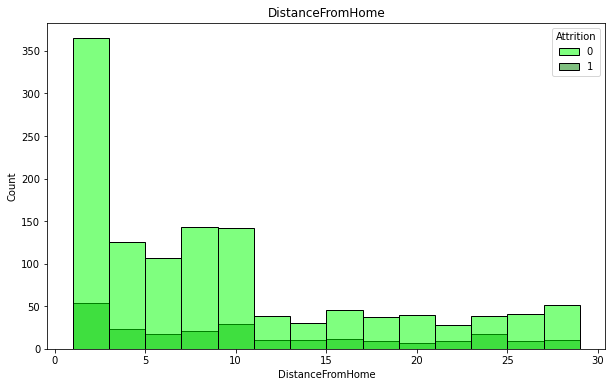

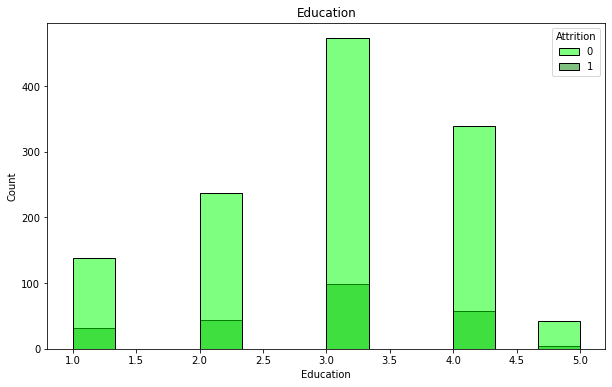

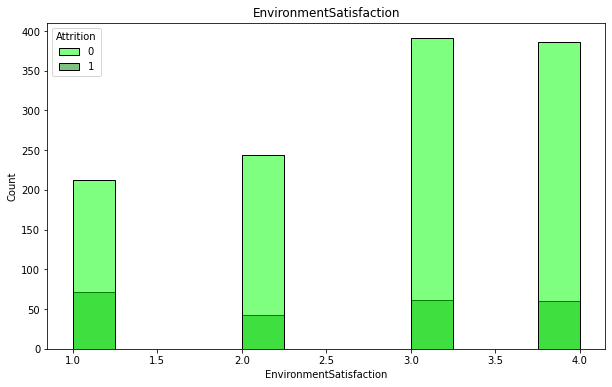

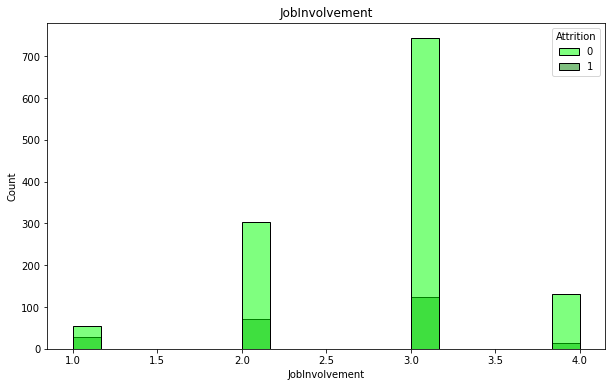

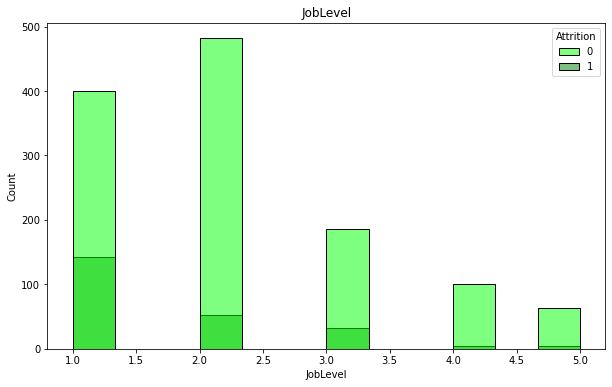

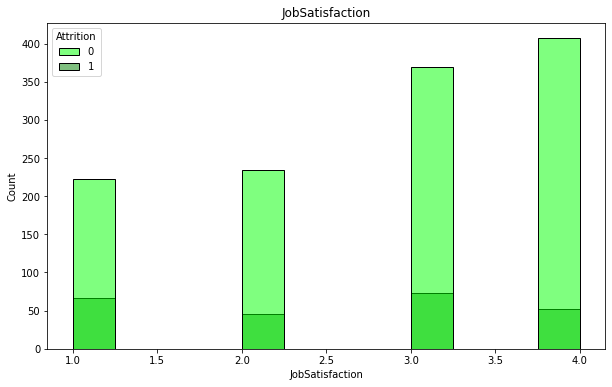

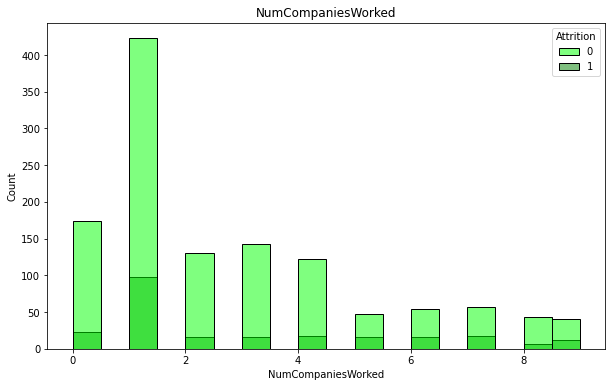

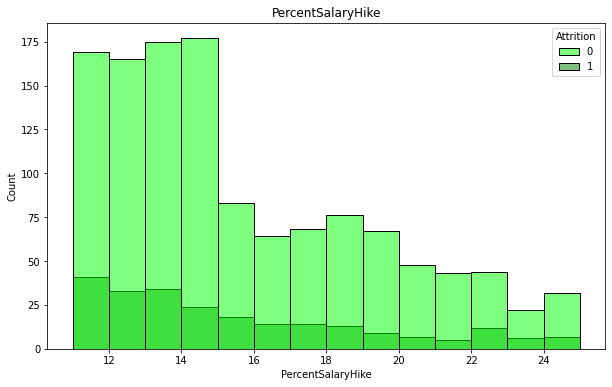

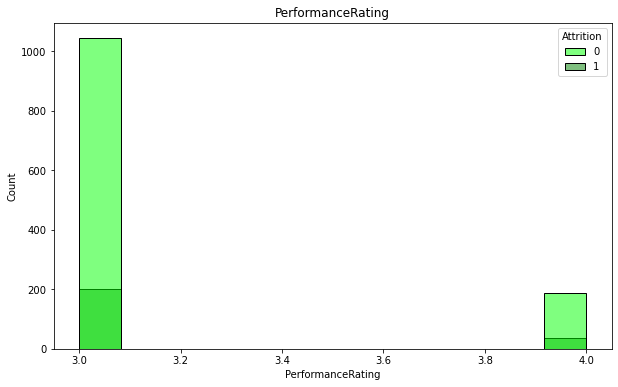

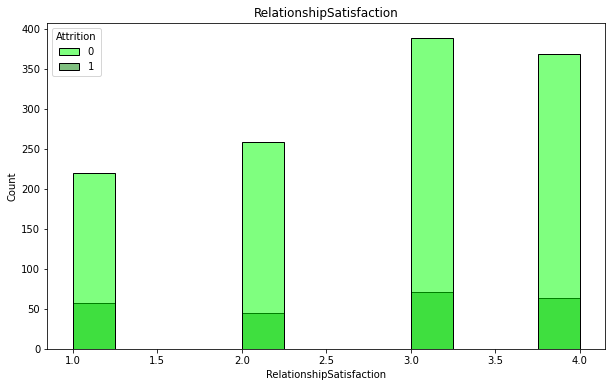

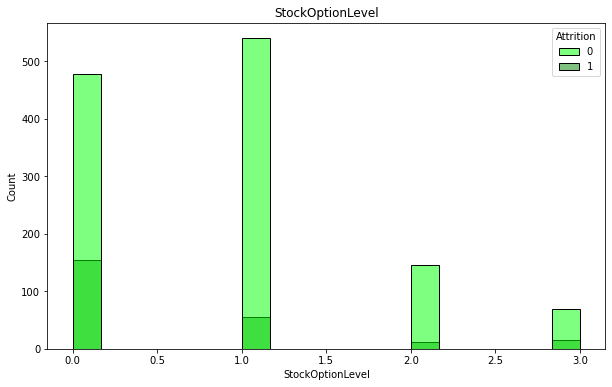

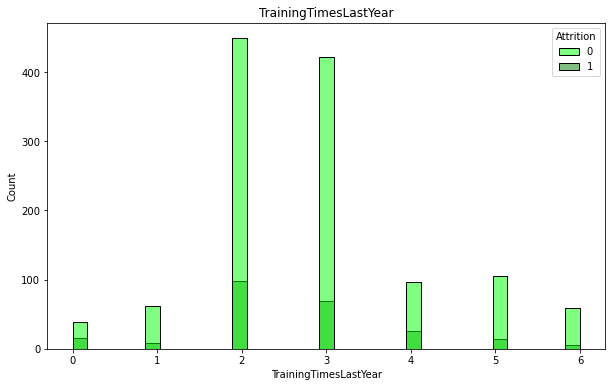

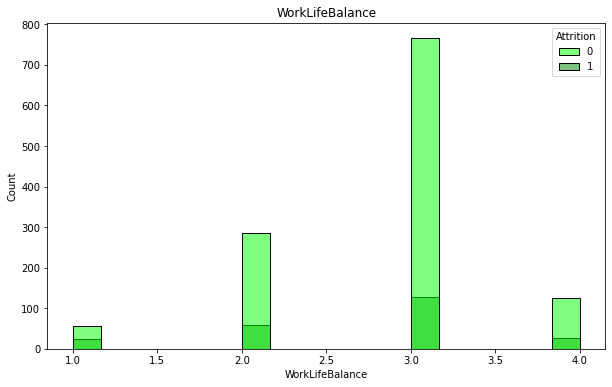

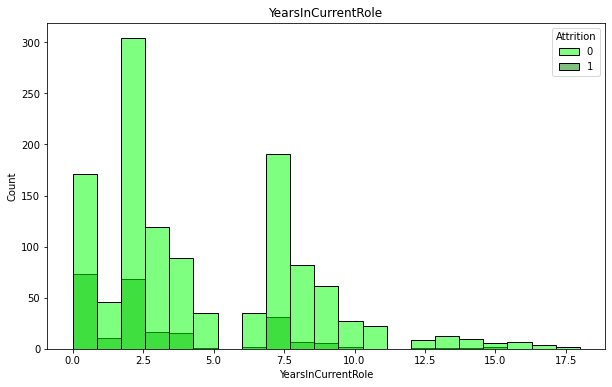

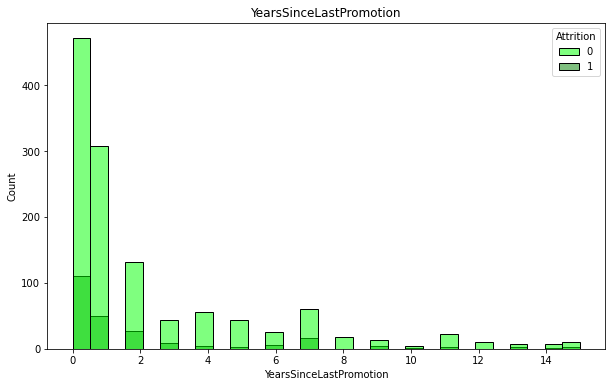

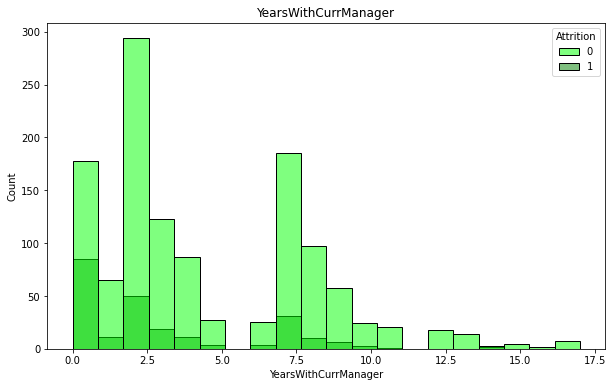

In [18]:
#Plotting all the features which are discontinuous(i.e. integer + unique)
for i in disc_col:
    plt.figure(figsize=(10,6))
    plt.title(i)
    sn.histplot(data = df, x = df[i], hue = "Attrition", kde = False, palette = ["lime", "green"])

It seems that EnvironmentSatisfaction, JobSatisfaction, PerformanceRating, and RelationshipSatisfaction features don't have big impact on the detrmination of Attrition of employees.

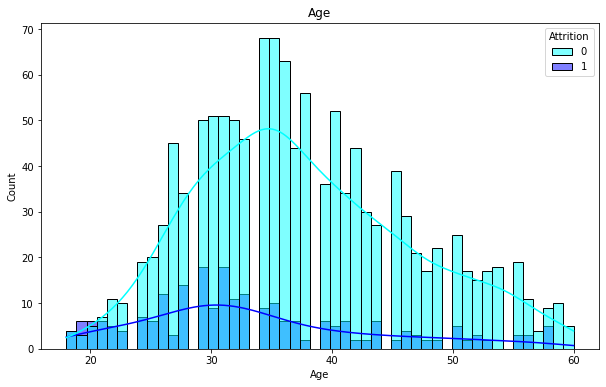

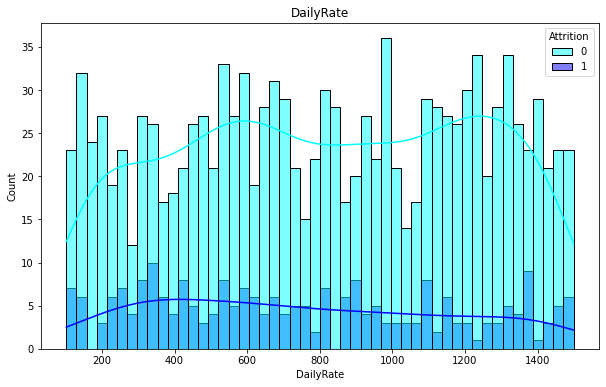

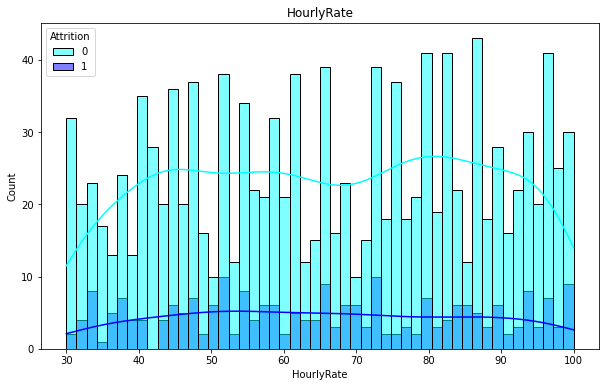

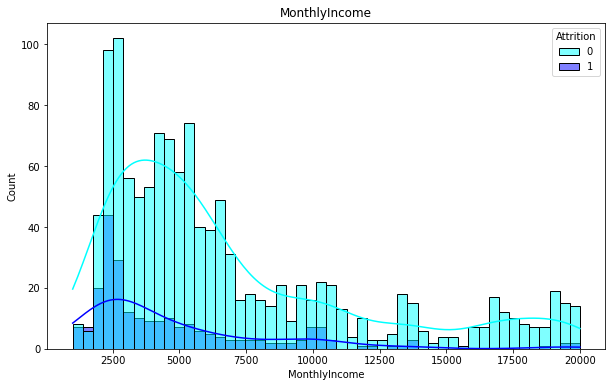

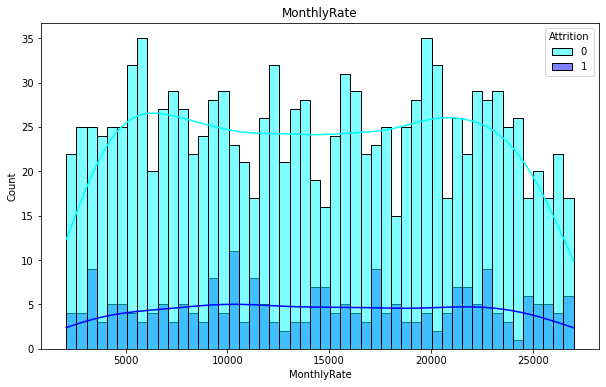

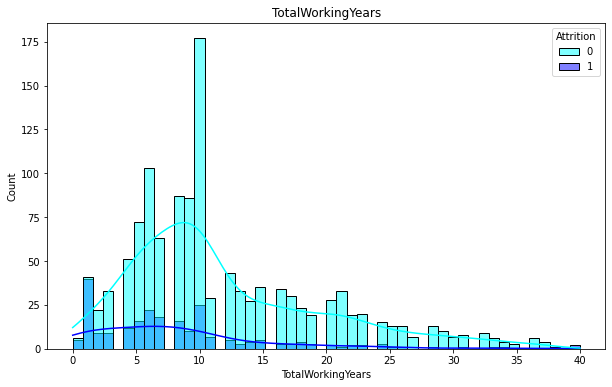

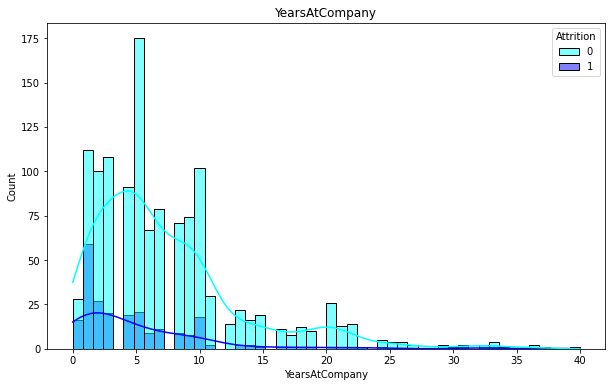

In [19]:
#Plotting all the features which are Continuous(i.e. integer + non unique)
for i in cont_col:
    plt.figure(figsize=(10,6))
    plt.title(i)
    sn.histplot(data = df, x = df[i], hue = "Attrition", kde = True, palette = ["cyan","blue"], bins=50)

OBSERVATION
- The workers with low MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.

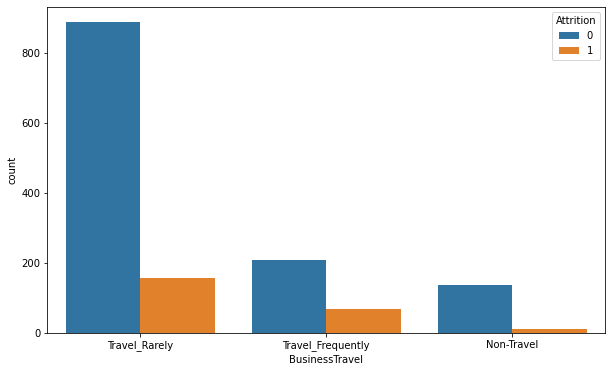

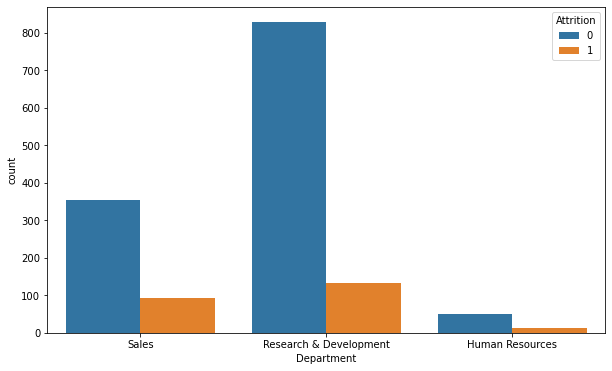

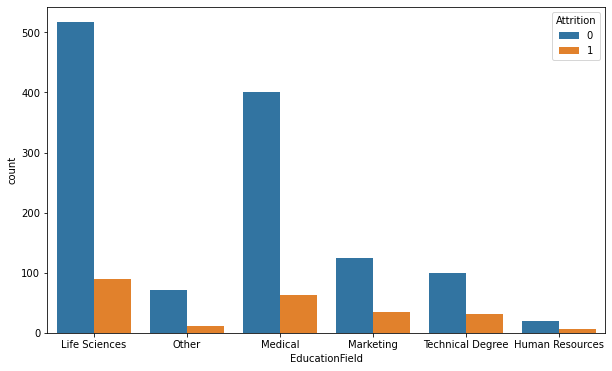

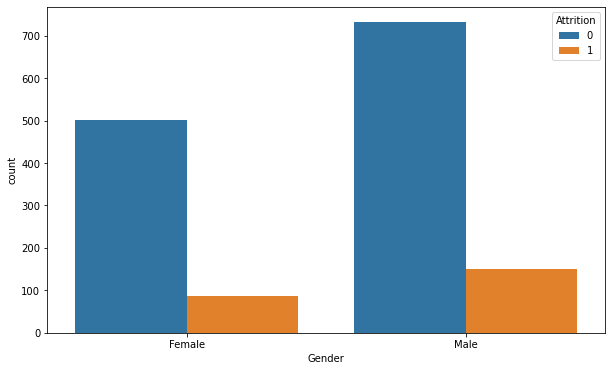

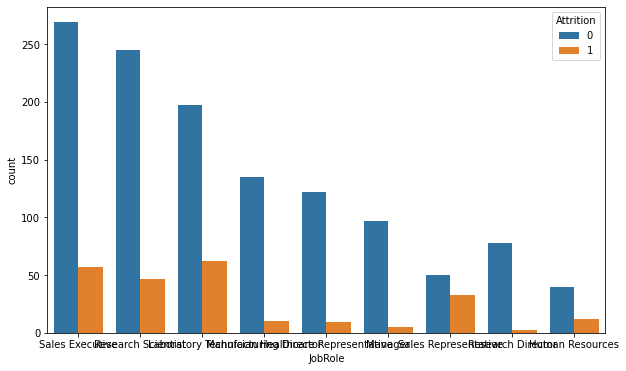

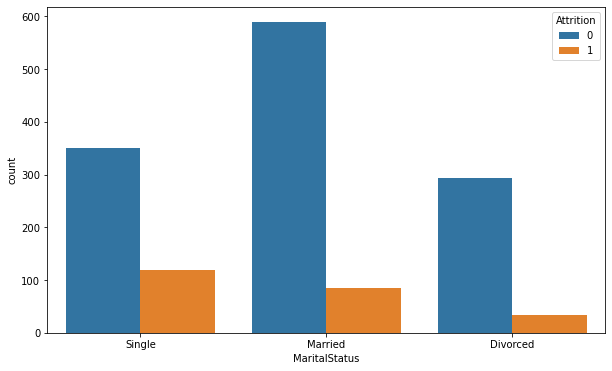

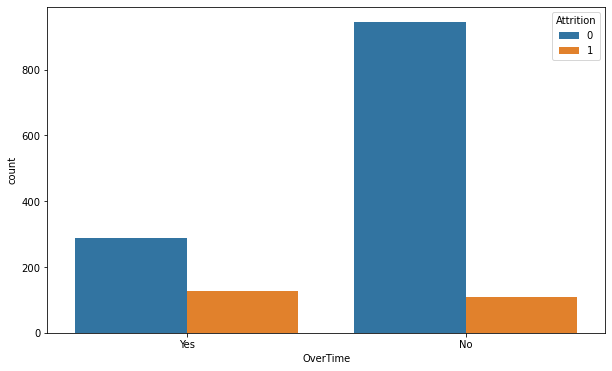

In [20]:
#Plotting all the categorical features and checking the relation with target
for i in object_col:
    plt.figure(figsize=(10,6))
    sn.countplot(df[i], hue=df['Attrition'])

OBSERVATION
- BusinessTravel : The workers who travel alot are more likely to quit then other employees.
- Department : The worker in Research & Development are more likely to stay then the workers on other departement.
- EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.
- Gender : The Male are more likely to quit.
- JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit than the workers in other positions.
- MaritalStatus : The workers who have Single marital status are more likely to quit than Married and Divorced.
- OverTime : The workers who work more hours are likely to quit their job.

## Multi-variate Analysis

In [21]:
#describing the dataset
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


I got all correlations of features with other features. Let me visualize it using heat map.

<AxesSubplot:>

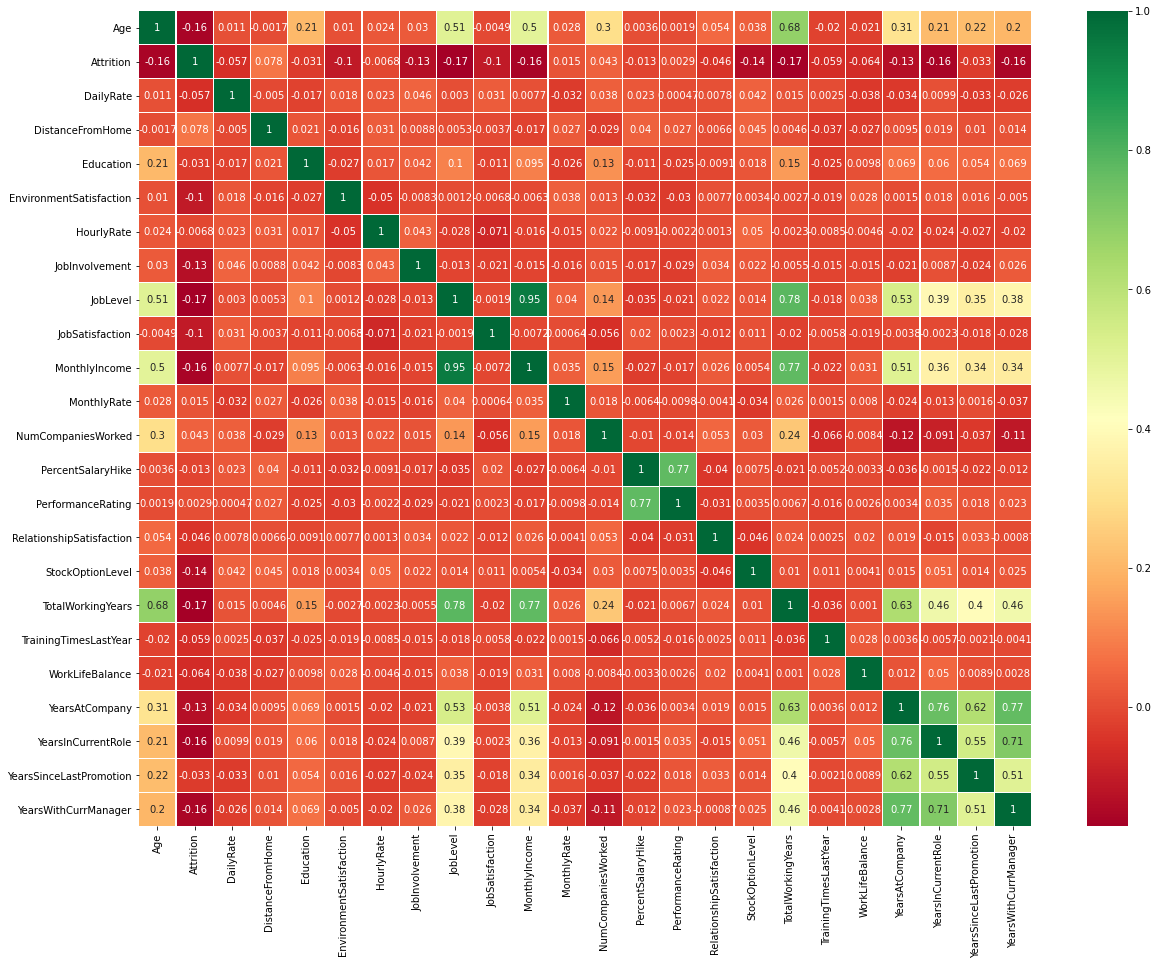

In [22]:
#Plotting heatmap with all features
plt.figure(figsize=(20,15))
sn.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10}, cmap="RdYlGn")

OBSERVATION:
- I don't see any feature highly correlated with my target
- Job level is highly correlated with MonthlyIncome & TotalWorkingYears.
- TotalWorkingYears is highly correlated with Age, JobLevel, MonthlyIncome.
- YearsAtCompany is highly correlated with YearsInCurrentRole, YearsWithCurrentManager
- YearsInCurrentRole is highly correlated with YearsWithCurrentManager.

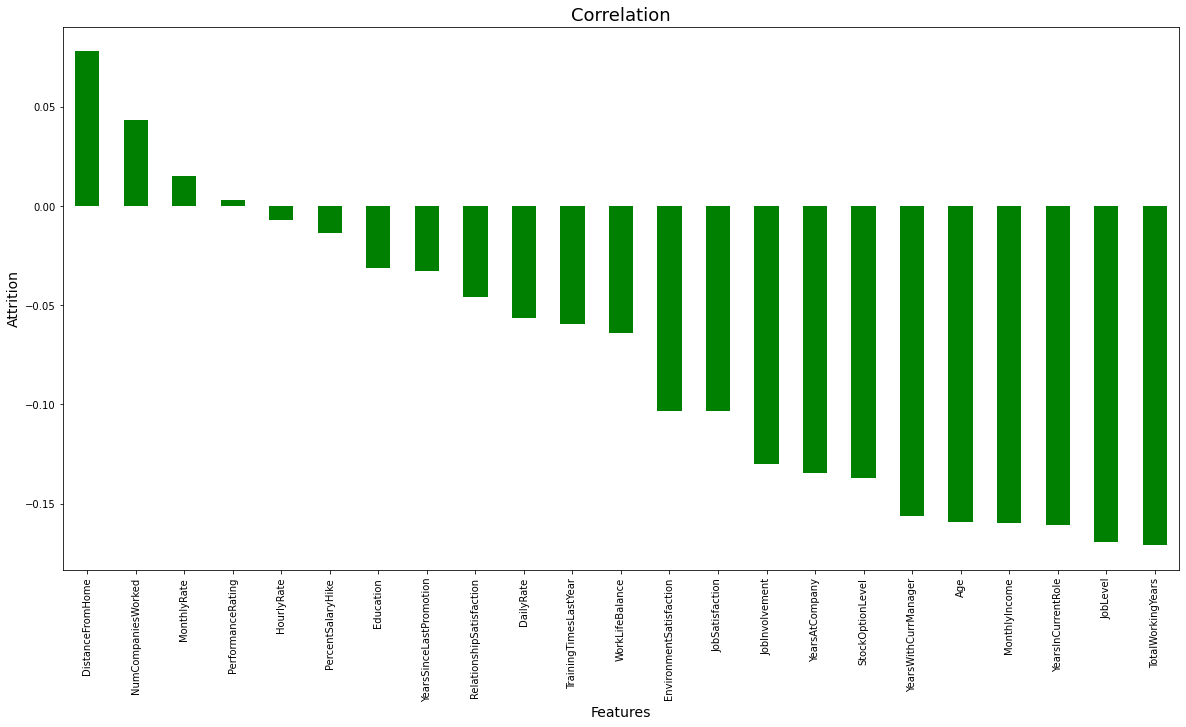

In [23]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(20,10))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Attrition',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

OBSERVATION:
- I see most of my features are highly negatively correlated with my target.

<Figure size 432x288 with 0 Axes>

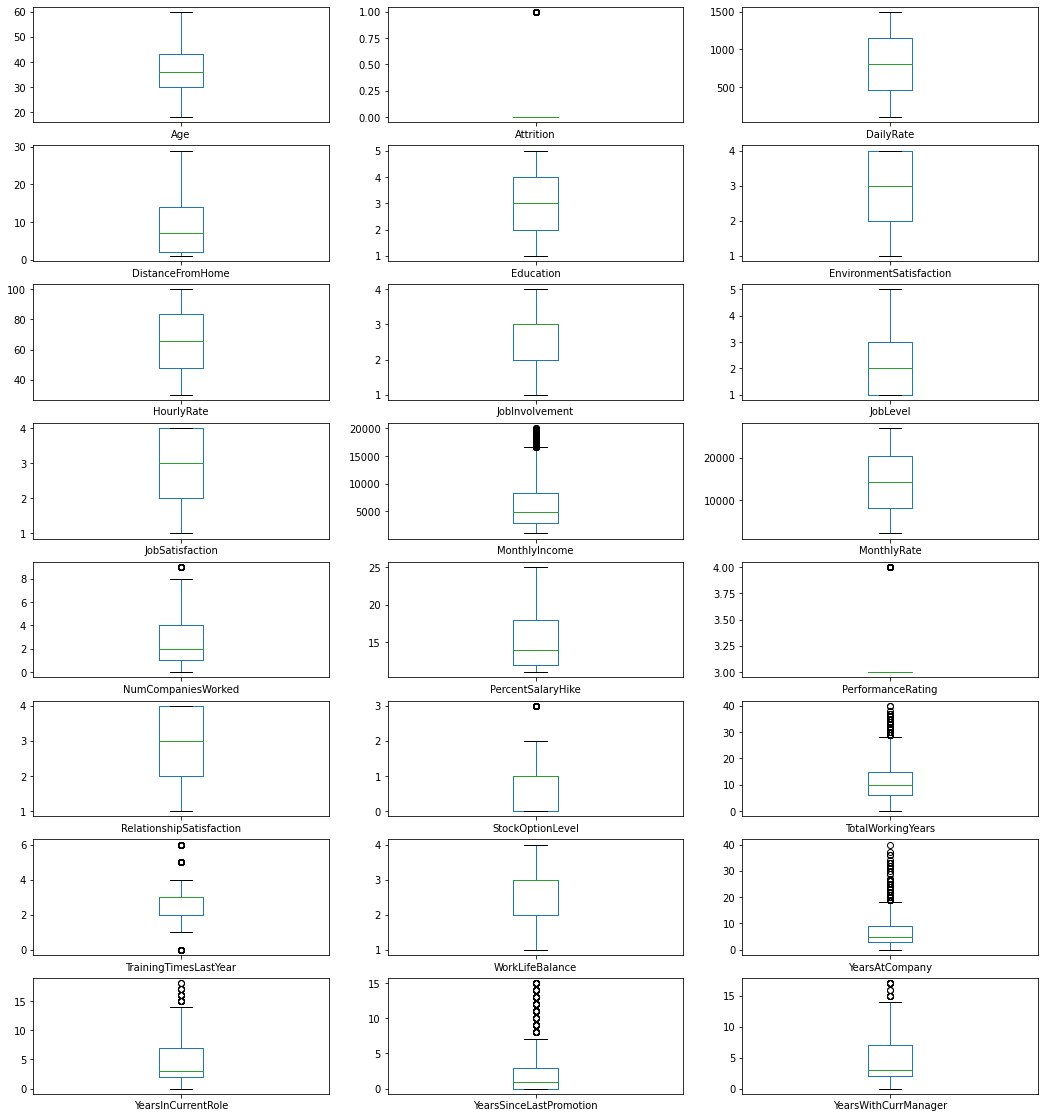

In [26]:
#Checking skewness with boxplot
plt.figure()
df.plot(kind="box",subplots=True,layout=(8,3),figsize=(18,20))
plt.show()

In [27]:
df.columns[df.dtypes != "object"]

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

As observed from boxplot, there are outliers present in the below mentioned columns: 

    MonthlyIncome - Continuous
    NumCompaniesWorked - Continuous
    PerformanceRating - Categorical - No need to remove outliers/skewness.
    StockOptionLevel - Categorical - No need to remove outliers/skewness.
    TotalWorkingYears - Continuous
    TrainingTimesLastYear - Continuous
    YearsAtCompany - Continuous
    YearsInCurrentRole - Continuous
    YearsSinceLastPromotion - Continuous
    YearsWithCurrManager - Continuous

## Data cleaning

### Treating Outliers

##### Zscore:

In [44]:
#Copy df in df1(new variable)
df1 = df.copy()

In [47]:
#Making a variable as dfContCols and listing all columns with outliers.
dfContCols = df1[['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [48]:
#Using Zscore to remove outliers
from scipy.stats import zscore
ZS = np.abs(zscore(dfContCols))
df1 = df1[(ZS<3).all(axis=1)]
df1.shape

(1387, 31)

In [49]:
#previous shape
df.shape

(1470, 31)

I've succefully removed the outliers using zscore and rows in my new dataset are 1387 whereas previously we had 1470 rows.

In [51]:
#Checking the data loss
((1470-1387)/1470)*100

5.646258503401361

So I get data loss of 5.64% hence I'll proceed with zscore.

### Treating Skewness

In [52]:
#check skewness
df1.skew()

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64

Keeping skewness range as +/-0.5 
I can see the skewness in:

    Attrition - target - No need to remove skewness
    DistanceFromHome - Continuous
    JobLevel - Categorical(No need to remove skewness)
    MonthlyIncome - Continuous
    NumCompaniesWorked - Continuous
    PercentSalaryHike - Continuous
    PerformanceRating - Categorical(No need to remove skewness)
    StockOptionLevel - Categorical(No need to remove skewness)
    TotalWorkingYears - Continuous
    TrainingTimesLastYear - Continuous
    WorkLifeBalance - Categorical(No need to remove skewness)
    YearsAtCompany - Continuous
    YearsInCurrentRole - Continuous
    YearsSinceLastPromotion - Continuous
    YearsWithCurrManager - Continuous
I need to remove skewness in these continuous columns.

In [53]:
#Creating list of all the columns with skewness
cols=["DistanceFromHome","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","TotalWorkingYears","TrainingTimesLastYear",
      "YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]

In [54]:
#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

df1[cols] = PT.fit_transform(df1[cols].values)
df1.skew()

Age                         0.472280
Attrition                   1.805983
DailyRate                  -0.017078
DistanceFromHome           -0.008149
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
YearsAtCompany             -0.025230
YearsInCurrentRole         -0.069631
YearsSinceLastPromotion     0.212301
YearsWithCurrManager       -0.070570
dtype: float64

I can notice that skewness has been removed in continuous columns. Let me check the distribution. 

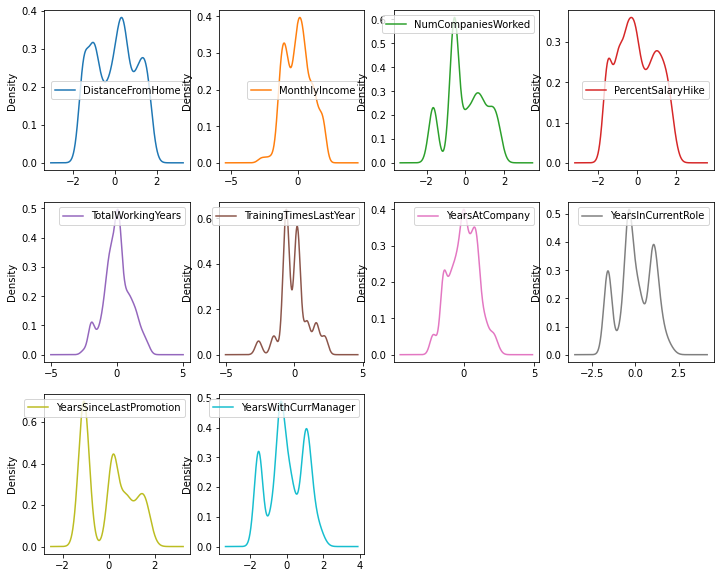

In [59]:
#Checking distribution with density graph
df1[cols].plot(kind="density",subplots=True,sharex=False,layout=(3,4),figsize=(12,10))
plt.show()

My continuous features now looks normally distributed.

### Label Encoding

In [61]:
#Encoding all the categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = df1.columns[df1.dtypes == "object"]
categorical_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [62]:
#Using label encoder to encode the categorical columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [63]:
#checking the columns and its type after encoding
df1[categorical_columns]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,2,2,1,0,7,2,1
1,1,1,1,1,6,1,0
2,2,1,4,1,2,2,1
3,1,1,1,0,6,1,1
4,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...
1465,1,1,3,1,2,1,0
1466,2,1,3,1,0,1,0
1467,2,1,1,1,4,1,1
1468,1,2,3,1,7,1,0


I've successfully encoded all the categorical columns

#### Visualizing after encoding

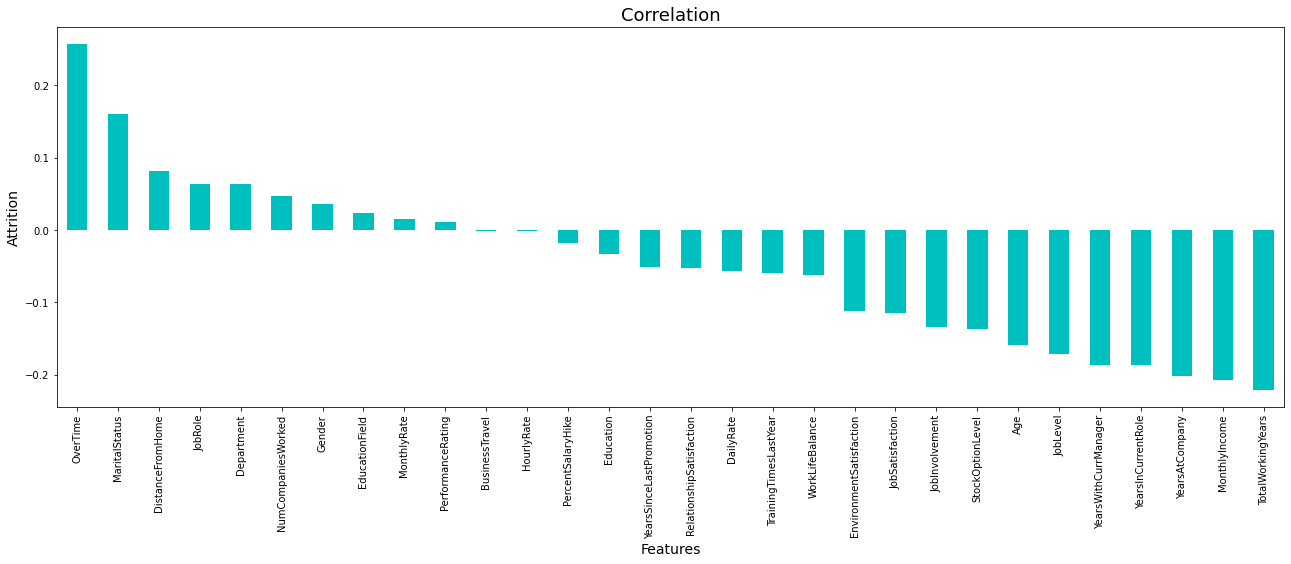

In [65]:
#Using barplot to check correlation
plt.figure(figsize=(22,7))
df1.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Attrition',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

BusinessTravel and HourlyRate shows very less correlation with target column. I can drop that if needed.

### Splitting independent & target variable

In [66]:
X = df1.drop("Attrition",axis=1)
y = df1["Attrition"]

Assigned y as target variable and X as remaining features.

### Treating class imbalance

In [67]:
#Treating Class imbalance in target using SMOTE
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X, y=SM.fit_resample(X, y)
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

I can see that the target column was balanced using SMOTE

### SCALING

In [68]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score            #using accuracy_score as this is classification problem
from sklearn.model_selection import train_test_split, cross_val_score

In [69]:
#Using StandardScaler to scale the independent variables
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [70]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.725619,0.768486,0.809746,1.595744,-1.670533,-0.750971,-0.904859,-0.416462,-1.040545,1.524856,...,-0.336841,-1.403695,-0.746558,0.029296,-2.710457,-2.196033,0.422048,0.482071,-1.096963,0.780360
1,1.664661,-0.743675,-1.295559,-0.345298,0.186189,-1.778896,-0.904859,0.507413,0.961035,-0.237030,...,2.968764,1.417500,0.510917,0.357756,0.288432,0.543537,1.165110,1.236905,0.249063,1.236882
2,0.256098,0.768486,1.502987,-0.345298,-1.176413,-0.750971,1.490174,1.431288,0.961035,1.418075,...,-0.336841,-0.463296,-0.746558,-0.152845,0.288432,0.543537,-2.054463,-1.481137,-1.096963,-1.430109
3,-0.213423,-0.743675,1.551590,-0.345298,-0.822977,1.304879,-0.904859,1.431288,-1.040545,-0.503982,...,-0.336841,0.477102,-0.746558,0.029296,0.288432,0.543537,0.826093,1.236905,1.135666,-1.430109
4,-0.917705,0.768486,-0.497436,-0.345298,-1.176413,-1.778896,0.691830,-1.340337,0.961035,-1.358230,...,-0.336841,1.417500,0.510917,-0.350312,0.288432,0.543537,-0.787020,-0.236123,0.811941,-0.193694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,-0.800325,0.768486,0.947882,1.595744,-0.347965,-0.750971,-0.106515,-0.416462,0.961035,1.151123,...,-0.336841,-0.463296,-0.746558,-1.255565,0.288432,-0.826248,-0.753158,-0.751109,-1.096963,-0.878790
2312,-0.213423,-0.743675,0.843001,-0.345298,0.721153,-0.750971,0.691830,0.507413,0.961035,0.403656,...,-0.336841,-0.463296,-0.746558,-0.348147,-0.557498,0.543537,-0.328527,0.102634,0.546443,-0.193694
2313,-0.213423,-0.743675,1.699959,-0.345298,-0.427922,2.332803,-0.904859,-0.416462,-1.040545,1.685028,...,-0.336841,-1.403695,0.510917,0.768697,-0.122175,0.543537,0.160525,0.578252,1.073524,0.500694
2314,-0.682944,-0.743675,-0.840220,-0.345298,1.394048,-0.750971,-0.904859,0.507413,0.961035,0.403656,...,-0.336841,-0.463296,-0.746558,-1.809756,0.196161,-0.826248,-1.290717,-1.481137,0.102245,-1.430109


The data looks scaled now. 

### Using VIF(Variance inflation factor) to remove multicolinearity

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.906293,Age
1,1.037659,BusinessTravel
2,1.045208,DailyRate
3,1.989477,Department
4,1.042133,DistanceFromHome
5,1.078691,Education
6,1.047238,EducationField
7,1.090881,EnvironmentSatisfaction
8,1.058633,Gender
9,1.026072,HourlyRate


Since all the VIF values of all the features are less than 10 so no need to remove any columns.
Now the multicolinearity issue is solved.

### FIND BEST random_state 

In [72]:
from sklearn.neighbors import KNeighborsClassifier as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)    #We used accuracy_score as this is classification problem
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8633093525179856  on Random_state  53


In [73]:
#Splitting the dataset for training and testing and using best random state.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = maxRS)

### Applying machine learning algorithms

In [75]:
#Creating a function to display the result/evaluation for each model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TESTING RESULTS: \n-------------------")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CROSS VALIDATION SCORE: {cross_val_score(model,X,y,cv=5).mean()}")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

####  Logistic Regression

In [77]:
#Calling the models

#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8561
CROSS VALIDATION SCORE: 0.8256265360840098
CONFUSION MATRIX:
[[300  41]
 [ 59 295]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.835655    0.877976  0.856115    0.856815      0.857211
recall       0.879765    0.833333  0.856115    0.856549      0.856115
f1-score     0.857143    0.855072  0.856115    0.856108      0.856088
support    341.000000  354.000000  0.856115  695.000000    695.000000


####  Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.9151
CROSS VALIDATION SCORE: 0.8995000744768005
CONFUSION MATRIX:
[[328  13]
 [ 46 308]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.877005    0.959502  0.915108    0.918253      0.919025
recall       0.961877    0.870056  0.915108    0.915967      0.915108
f1-score     0.917483    0.912593  0.915108    0.915038      0.914992
support    341.000000  354.000000  0.915108  695.000000    695.000000


#### Support Vector Machine

In [79]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8604
CROSS VALIDATION SCORE: 0.8269270872123332
CONFUSION MATRIX:
[[303  38]
 [ 59 295]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.837017    0.885886  0.860432    0.861451      0.861908
recall       0.888563    0.833333  0.860432    0.860948      0.860432
f1-score     0.862020    0.858806  0.860432    0.860413      0.860383
support    341.000000  354.000000  0.860432  695.000000    695.000000


#### AdaBoost

In [80]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier()
ab_clf.fit(X_train, y_train)

evaluate(ab_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8935
CROSS VALIDATION SCORE: 0.8399298056155506
CONFUSION MATRIX:
[[309  32]
 [ 42 312]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.880342    0.906977  0.893525    0.893659      0.893908
recall       0.906158    0.881356  0.893525    0.893757      0.893525
f1-score     0.893064    0.893983  0.893525    0.893523      0.893532
support    341.000000  354.000000  0.893525  695.000000    695.000000


#### KNeighbors Classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_clf = KNN()
knn_clf.fit(X_train, y_train)

evaluate(knn_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.8633
CROSS VALIDATION SCORE: 0.8402472629775823
CONFUSION MATRIX:
[[250  91]
 [  4 350]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.984252    0.793651  0.863309    0.888951      0.887169
recall       0.733138    0.988701  0.863309    0.860919      0.863309
f1-score     0.840336    0.880503  0.863309    0.860420      0.860795
support    341.000000  354.000000  0.863309  695.000000    695.000000


#### Gradient Boosting Classifier

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

evaluate(gb_clf, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.9209
CROSS VALIDATION SCORE: 0.8688761450808073
CONFUSION MATRIX:
[[322  19]
 [ 36 318]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.899441    0.943620  0.920863    0.921531      0.921944
recall       0.944282    0.898305  0.920863    0.921293      0.920863
f1-score     0.921316    0.920405  0.920863    0.920861      0.920852
support    341.000000  354.000000  0.920863  695.000000    695.000000


I got the accuracy_score & cross validation scores of all the algorithms
On checking the difference between accuracy_score & cross_val_score, I found that Random Forest Classifier has least difference. Hence, I will tune this model.

## HYPERPARAMETER TUNING

In [83]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [85]:
#RandomForestClassifier Tuning

#Creating RandomForestClassifier parameters dictionary

param_grid = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300],
             'max_features': ["auto","sqrt","log2"]}

In [86]:
#Create a GridSearchCV object and fit it to the training data
rf_hp = GridSearchCV(RandomForestClassifier(),param_grid,refit=True)   #or cv=5
rf_hp.fit(X_train,y_train)
rf_hp.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 100}

In [87]:
#Using the best parameters
final_mod = RandomForestClassifier( criterion='entropy', max_depth=20, n_estimators=100, max_features='auto' )
final_mod.fit(X_train,y_train)
pred = final_mod.predict(X_test)
evaluate(final_mod, X_train, X_test, y_train, y_test)

TESTING RESULTS: 
-------------------
ACCURACY SCORE: 0.9223
CROSS VALIDATION SCORE: 0.8973393163029716
CONFUSION MATRIX:
[[330  11]
 [ 43 311]]
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.884718    0.965839  0.922302    0.925279      0.926037
recall       0.967742    0.878531  0.922302    0.923137      0.922302
f1-score     0.924370    0.920118  0.922302    0.922244      0.922204
support    341.000000  354.000000  0.922302  695.000000    695.000000


### After tuning, the accuracy increased to 92.23%

## ROC-AUC Curve

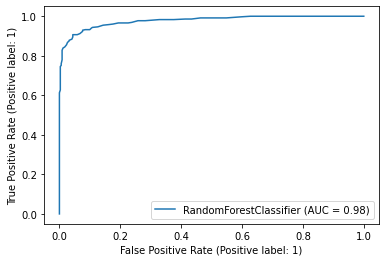

In [89]:
#Plotting ROC curve for the best model.
from sklearn.metrics import plot_roc_curve

plot_roc_curve(final_mod,X_test,y_test)

The AUC score of my final model(RF) is 0.98

## SERIALIZATON (Saving model)

In [90]:
#Saving the model as .pkl file
import joblib
joblib.dump(final_mod ,"HR_analytics.pkl")

['HR_analytics.pkl']

### Done :)